# COVID and Cognition

The data we will analyse today consists of the performance of 50 people who had recovered from COVID-19 illness after being in critical care. They completed three computerised cognitive tasks called Target Detection, Spatial Span and Verbal Analogies. Our aim is to understand whether the patients' cognition was affected by COVID-19 in the chronic phase after recovering from the viral infection and whether the type of symptoms and the gravity of the disease (e.g. whether participants ended up requiring mechanical breathing support) played a role on the level of cognitive changes that occurred. 

Each one of the cognitive tasks completed by patients measures a different aspect of cognition: 

1. **Target Detection:** attention task. This task measures the ability to identify specific *relevant* information in the context of many distractions. The task is designed to be particularly challenging due to the rate at which targets and distractors appear in the visual array, which requires participants to continously pay attention in order to avoid missing targets and losing points. 
2. **Spatial Span:** memory task. In this task, participants are presented with a 4 x 4 grid, on which is displayed a sequence of squares in different positions. The participant must then click the squares in the order that they were highlighted. Every time a sequence is recalled correctly, the length of the subsequent sequence is incremented by one, making it more difficult. The task ends when a participant fails the same difficulty level three times.
3. **Verbal Analogies:** language task. In this task, participants are presented with two pairs of words and they must decide if the pairs are related to each other in the same 'analogous' way. Participants must indicate their decision by selecting the True or False buttons presented below the word pairs.

The performance in cognitive tasks is typically measured in two ways.

1. Accuracy - the number or proportion of correct answers given
2. Reaction time (RT) - the median or mean time required by participants to complete each single trial of a task.

Screen grabs of the three tasks are presented below.

Verbal Analogies |  Target detection | Spatial Span |
:-------------------------:|:-------------------------: |:-------------------------: |
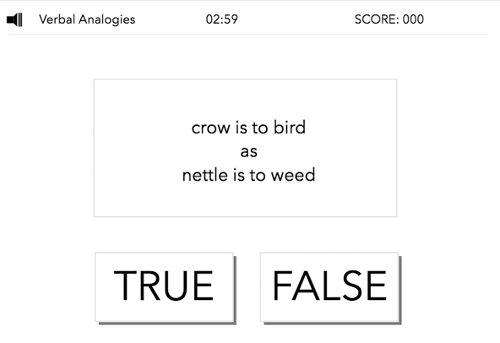 | 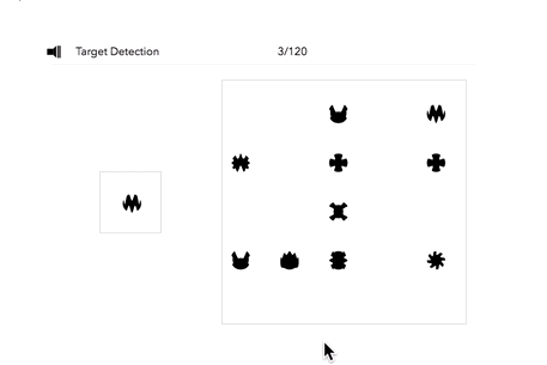|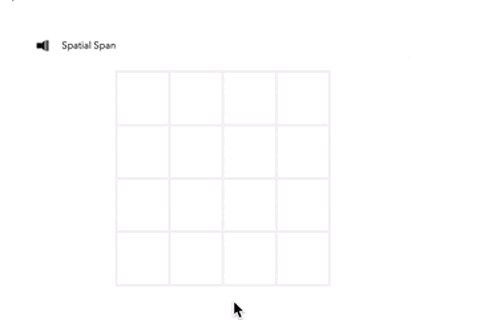

Now that we know our research aim and the description of the cognitive assessment, we can continue with the next steps, namely the data cleaning and analysis. 

Let us first import the libraries we will need for today's workshop and install any new ones.

In [2]:
pip install openpyxl seaborn

Note: you may need to restart the kernel to use updated packages.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize
import seaborn as sb
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

sb.set_theme("talk")
sb.set_style("whitegrid")

Then, download the data [here](https://imperiallondon-my.sharepoint.com/:f:/g/personal/vg816_ic_ac_uk/EuPCq2zHgm5HiwlbMzuRGYwBOrv8nMeSkGfKE-Hp1pnsZg?e=zrVb8T) that you need to run this workshop and this link and save them in the folder called `Data`.

Now let's open the data file as a dataframe. Note that so far we have worked with `.csv` files but Python can just as easily open and manipulate other file types like `excel`. Have a quick look at your data 

In [2]:
df = pd.read_excel("Data/covid_dataset.xlsx")
df.head(10)

Unnamed: 0     userID   Age  Sex 1-Male 2-Female Handedness  \
0           0  4133880.0  "63"                    2      Right   
1           1  4227668.0  "70"                    1      Right   
2           2  4105609.0  "54"                    1      Right   
3           3  4105207.0  "55"                    2      Right   
4           4  4239617.0  "71"                    1      Right   
5           5  4303013.0  "34"                    2       Left   
6           6  3928857.0  "61"                    1       Left   
7           7  3929051.0  "68"                    1        NaN   
8           8  3978084.0  "66"                    2      Right   
9           9  3939818.0  "45"                    1       Left   

            Qualifications First Language First Language binary Symtpm onset  \
0  Some college, no degree         Polish                 Other   2020-05-05   
1           O levels/GCSEs        English               english   2020-03-18   
2                 A levels        English               english   2020-03-22   
3  Some college, no degree        English               English   2020-03-31   
4          Doctoral degree        English               English   2020-03-10   
5                 A levels        English               English   2020-04-22   
6                 Not done        English               English   2020-03-12   
7                 Not done        English               English   2020-03-28   
8            O level/ GCSE        Chinese                 Other   2020-02-27   
9           Medical Degree        English               English   2020-04-01   

  tested date  ...  RTDRI_fourTowers RTrs_learningCurves  \
0         NaT  ...           10242.0              50.764   
1         NaT  ...           11151.0              50.551   
2         NaT  ...           11171.0              50.247   
3         NaT  ...           12665.0              50.618   
4         NaT  ...            8612.5              50.792   
5         NaT  ...           11621.0              50.539   
6         NaT  ...           21358.0              50.958   
7  2020-08-07  ...           25378.0              50.932   
8         NaT  ...           18250.0              51.095   
9         NaT  ...           16734.0              50.802   

   RTrs_manipulations2D  RTrs_TOL  RTrs_motorControl  \
0                4504.0   13709.0            13.0790   
1                8262.0   11550.0            23.0550   
2                6937.0    9411.0            12.0190   
3               16940.0   11868.0             8.2759   
4                4809.5    7010.0            28.4730   
5                3961.0    8700.5            14.9220   
6                5902.0   15116.0            14.8830   
7                9704.0   17245.0            20.1900   
8                8597.0   38018.0            12.2560   
9                4294.0   20611.0            14.5350   

  RTrs_prospectiveMemoryWords_1_delayed  \
0                                1041.0   
1                                1010.5   
2                                 800.5   
3                                1005.0   
4                                1010.0   
5                                1298.0   
6                                 729.0   
7                                 902.0   
8                                1125.0   
9                                 710.5   

   RTrs_prospectiveMemoryWords_1_immediate RTrs_spatialSpan  \
0                                   1113.0           4245.5   
1                                   1066.0           2863.0   
2                                    930.0           2383.0   
3                                   1676.5           2642.0   
4                                    999.0           5343.5   
5                                   1079.5           5281.0   
6                                    846.5           5177.0   
7                                   1040.5           6145.0   
8                                   1441.0          12340.0   
9            

Notice that not all columns are shown, as Python has a cap on how many columns it can show in a table. To help us visualise the data better, we will remove that cap.

In [3]:
pd.set_option('display.max_columns', None)
df.head()

Unnamed: 0     userID   Age  Sex 1-Male 2-Female Handedness  \
0           0  4133880.0  "63"                    2      Right   
1           1  4227668.0  "70"                    1      Right   
2           2  4105609.0  "54"                    1      Right   
3           3  4105207.0  "55"                    2      Right   
4           4  4239617.0  "71"                    1      Right   

            Qualifications First Language First Language binary Symtpm onset  \
0  Some college, no degree         Polish                 Other   2020-05-05   
1           O levels/GCSEs        English               english   2020-03-18   
2                 A levels        English               english   2020-03-22   
3  Some college, no degree        English               English   2020-03-31   
4          Doctoral degree        English               English   2020-03-10   

  tested date  COVID Symptom onset to imaging & cognitive testing (days)  \
0         NaT                                                 38           
1         NaT                                                 87           
2         NaT                                                 97           
3         NaT                                                 95           
4         NaT                                                121           

  Admission to imaging & cognitive testing (days)  \
0                                              34   
1                                              65   
2                                              90   
3                                              99   
4                                             111   

   Covid-19 severity (WHO Ordinal Scale)  Mechanical ventilation (1-Y,0-no)  \
0                                      6                                  1   
1                                      7                                  1   
2                                      6                                  1   
3                                      7                                  1   
4                                      7                                  1   

   Days mechanically ventilated Trachy Y/N  \
0                            14          N   
1                            47          Y   
2                            28          Y   
3                            18          N   
4                            50          Y   

   Lowest PaO2/FiO2 ratio (severity of lung injury, lower is worse)  \
0                                                8.0                  
1                                               10.0                  
2                                                8.0                  
3                                               10.0                  
4                                                9.5                  

  Extrapulmonary organ dysfunction/support Highest CRP during admission  \
0                                        Y                          286   
1                                        Y                          350   
2                                        Y                          399   
3                                        Y                          405   
4                                        Y                          367   

  Highest D-Dimer during admission  GAD-7 PHQ-9  PCL-5  GAD7 1. GAD7 2.  \
0                              242      4     3     21      1.0       0   
1                            11593      1     0      5      0.0       0   
2                             3161      9     9     16      1.0       1   
3                              861      4     5     13      0.0       1   
4                              952      0     0      3      0.0       0   

   GAD7 3.   GAD7 4.   GAD7 5.  GAD7 6.  GAD7 7.  PHQ9 1.  PHQ9 2.  PHQ9 3.  \
0       1.0       1.0      0.0      0.0      1.0      0.0      0.0      1.0   
1       0.0       0.0      0.0      0.0      0.0      0.0      0.0      3.0   
2       2.0       2.0      1.0 

Now you can see all 79 columns. Please go through each column and try to understand what it is that they are measuring.

**HINT**: there are two different columns that have scores for the three tasks of interest. These scores represent two different things, namely the accuracy and the median RT. If patients are impaired, then we expect their accuracy to be lower compared to healthy participants, and their RT to be higher, because participants need longer times to complete the same tasks..

There is a lot of information contained in this dataset. But for today's tutorial we do not need all of this information. Let's try to curate a smaller dataset that only contains variables we are interested in analysing. We are going to keep several demographic variables, some information about COVID19 severity and the accuracy results of 3 cognitive tasks.

In [4]:
df2 = pd.concat([df.loc[:, "userID":"First Language binary"], 
                 df["Mechanical ventilation (1-Y,0-no)"], 
                 df.loc[:, "rs_spatialSpan":"rs_verbalAnalogies"]], axis=1)

In [5]:
df2.head()

userID   Age  Sex 1-Male 2-Female Handedness           Qualifications  \
0  4133880.0  "63"                    2      Right  Some college, no degree   
1  4227668.0  "70"                    1      Right           O levels/GCSEs   
2  4105609.0  "54"                    1      Right                 A levels   
3  4105207.0  "55"                    2      Right  Some college, no degree   
4  4239617.0  "71"                    1      Right          Doctoral degree   

  First Language First Language binary  Mechanical ventilation (1-Y,0-no)  \
0         Polish                 Other                                  1   
1        English               english                                  1   
2        English               english                                  1   
3        English               English                                  1   
4        English               English                                  1   

   rs_spatialSpan  rs_targetDetection  rs_verbalAnalogies  
0             4.0                65.0                 6.0  
1             4.0                32.0                11.0  
2             5.0                63.0                 8.0  
3             5.0                35.0                21.0  
4             6.0                64.0                38.0

Our dataset looks a lot more manageable now! However, some of the variable names we have are not very intuitive. Let's change the name of the cognitive tasks so that it is easier to understand what they measure.

In [6]:
df2.rename(columns = {'rs_spatialSpan':'memory_spatialSpan', 
                      'rs_verbalAnalogies':'language_verbalAnalogies', 
                      'rs_targetDetection':'attention_targetDetection'}, inplace = True)
df2.head()

userID   Age  Sex 1-Male 2-Female Handedness           Qualifications  \
0  4133880.0  "63"                    2      Right  Some college, no degree   
1  4227668.0  "70"                    1      Right           O levels/GCSEs   
2  4105609.0  "54"                    1      Right                 A levels   
3  4105207.0  "55"                    2      Right  Some college, no degree   
4  4239617.0  "71"                    1      Right          Doctoral degree   

  First Language First Language binary  Mechanical ventilation (1-Y,0-no)  \
0         Polish                 Other                                  1   
1        English               english                                  1   
2        English               english                                  1   
3        English               English                                  1   
4        English               English                                  1   

   memory_spatialSpan  attention_targetDetection  language_verbalAnalogies  
0                 4.0                       65.0                       6.0  
1                 4.0                       32.0                      11.0  
2                 5.0                       63.0                       8.0  
3                 5.0                       35.0                      21.0  
4                 6.0                       64.0                      38.0

Try to change the column called `Qualifications` to `Education`

In [7]:
#CODE HERE

Now let's look at the data types for each of our variables. We discussed these during the primer, but as a quick summary, it is important that the data type matches what we expect. Strings are usually saved as objects in python and numeric variables are saved as integers (int64) or float (float64). However, sometimes either due to humar error or due to the way the data is saved, Python might assign the wrong data type to your variables (e.g. numbers may be saved as strings). When this happens, statistical tests throw errors and so do certain plotting functions. It can take a while to figure out where the errors come from. Have a look at our data and see if you can spot any wrong data types.

In [8]:
df2.dtypes

userID                               float64
Age                                   object
Sex 1-Male 2-Female                    int64
Handedness                            object
Qualifications                        object
First Language                        object
First Language binary                 object
Mechanical ventilation (1-Y,0-no)      int64
memory_spatialSpan                   float64
attention_targetDetection            float64
language_verbalAnalogies             float64
dtype: object

It looks like Age was saved as an object, instead of integer. Let's change that. First, we get rid of the quotation marks around the numbers, then we tell python to convert those numbers to `int`

In [9]:
df2.Age = df["Age"].str.strip('\"') 


In [10]:
df2.Age = df2.Age.astype(int)

In [11]:
df2.dtypes # check that the changes have worked

userID                               float64
Age                                    int64
Sex 1-Male 2-Female                    int64
Handedness                            object
Qualifications                        object
First Language                        object
First Language binary                 object
Mechanical ventilation (1-Y,0-no)      int64
memory_spatialSpan                   float64
attention_targetDetection            float64
language_verbalAnalogies             float64
dtype: object

Now that we have all of our data in the right format, we may want to check if the values contained in the columns are consistent. If you have a look in the `First language binary` column you will notice that some of the values are capitalised while others are not. This is a problem as any statistics we run will assume that `english` and `English` are two distinct groups. To fix this, we can choose a consistent way to show this and stick with it.

In [12]:
df2['First Language binary'] = df2['First Language binary'].str.title()
df2.head()

userID  Age  Sex 1-Male 2-Female Handedness           Qualifications  \
0  4133880.0   63                    2      Right  Some college, no degree   
1  4227668.0   70                    1      Right           O levels/GCSEs   
2  4105609.0   54                    1      Right                 A levels   
3  4105207.0   55                    2      Right  Some college, no degree   
4  4239617.0   71                    1      Right          Doctoral degree   

  First Language First Language binary  Mechanical ventilation (1-Y,0-no)  \
0         Polish                 Other                                  1   
1        English               English                                  1   
2        English               English                                  1   
3        English               English                                  1   
4        English               English                                  1   

   memory_spatialSpan  attention_targetDetection  language_verbalAnalogies  
0                 4.0                       65.0                       6.0  
1                 4.0                       32.0                      11.0  
2                 5.0                       63.0                       8.0  
3                 5.0                       35.0                      21.0  
4                 6.0                       64.0                      38.0

Try to do the same for the `Handedness` variable.

In [13]:
#CODE HERE

We may also wish to encode some of our categorical variables into a numeric format. This is usually done as specific statistical techniques, as well as machine learning algorithms (which we will discuss in later lectures), require categorical data to be in a numeric format. Therefore, it is always safer to have your numeric data saved in a numeric format when possible. 

There are different ways to encode variables, and the two most common ones are `integer encoding` and `one-hot-encoding`. Integer encoding consists in assigning an integer value to each category. Instead, one-hot encoding represents categorical variables as binary vectors. Concretely if you have three potential alternatives for one category, then, for each participant three columns will be made, one per alternative, and a one assigned within the column that each subject belongs to, whilst all others will be assigned a value of 0.

Both integer and one-hot encoding can be used. However, one limitation of integer encoding is that it introduces an *order* when assigning an integer to each group, which might not really be meaningful. So, it should be used carefully, based on the type of anaysis that you want to do. Converseley, if there are many possible answers (consider a persons response time) then one hot encoding can require too many columns. 

The language variable is a good example where `one-hot-encoding` encoding would be useful. Let's see how this can be done below.

The most common way to one-hot-encode in Python is to use the `get_dummies` function. If you want to see further examples of this, we have some in our primer.

In [14]:
# Text Data of First Language is converted into Numeric Binary Data
df_one = pd.get_dummies(df2['First Language binary'])
df_one.head()
df_one.shape

(50, 2)

On the other hand, if you prefer to integer encode there are mutliple approaches that can be used. The first way is to define a dictionary on your own, in order to be able to decide which integer is assigned to which feature. Below, we assign value one to all the fields which have `English` in them and value zero to those with `Other`

In [15]:
mapping_language = {"English": 1, "Other": 0}
mapped_language = df2['First Language binary'].map(mapping_language)
mapped_language.head()

0    0
1    1
2    1
3    1
4    1
Name: First Language binary, dtype: int64

Based on whether you choose to one-hot encode or integer encode your features, you will need to conduct your analysis slightly differently, mainly when training regression models. Whether you should one-hot-encode or integer encode mainly depends on the type of analysis you need to conduct. In this case, integer encoding is enough. 

In [16]:
df2['First Language binary'] = mapped_language

Let's now rename the column into an easy-to-understand name

In [17]:
df2.rename(columns = {'First Language binary':'First Language 1-English 0-Other'}, inplace = True)
df2.head()

userID  Age  Sex 1-Male 2-Female Handedness           Qualifications  \
0  4133880.0   63                    2      Right  Some college, no degree   
1  4227668.0   70                    1      Right           O levels/GCSEs   
2  4105609.0   54                    1      Right                 A levels   
3  4105207.0   55                    2      Right  Some college, no degree   
4  4239617.0   71                    1      Right          Doctoral degree   

  First Language  First Language 1-English 0-Other  \
0         Polish                                 0   
1        English                                 1   
2        English                                 1   
3        English                                 1   
4        English                                 1   

   Mechanical ventilation (1-Y,0-no)  memory_spatialSpan  \
0                                  1                 4.0   
1                                  1                 4.0   
2                                  1                 5.0   
3                                  1                 5.0   
4                                  1                 6.0   

   attention_targetDetection  language_verbalAnalogies  
0                       65.0                       6.0  
1                       32.0                      11.0  
2                       63.0                       8.0  
3                       35.0                      21.0  
4                       64.0                      38.0

Try to do apply the same concept of encoding to the `Handedness` variable. Sex is already encoded for you, so you don't need to do it.

In [18]:
#CODE HERE

Now, before moving forward we may also want to check the validity of the data. Are there any odd values that are not within the expected range? The best way to examine this is via plotting. 

Let's visualise some of the variables in the dataset. We will use `seaborn` to create the following plots. `seaborn` is a slightly more advanced way to make plots in python compared to `matplotlib`. We created an **optional lecture on seaborn, that you can complete if you are interested. It is not compulsory but it will make your plots look much nicer!!** 

In brief, the majority of plots in sebaorn require four arguments: `data` that requires the name of the dataframe, `x` that specifies the name of the column that should be plotted in x, `y` that specifies the name of the column that should be plotted in y, and `hue` that gives information on whether the colour of the plots should have any meaning (e.g. red for one category and blue for another category). Hue takes again as input the name of the column that specifies the different categories. 

Each different type of plot (e.g. histograms, boxplots..) has additional optional arguments that can be checked using the `help` function (or the seaborn lecture). 

Text(0.5, 1.0, 'Accuracy Spatial Span')

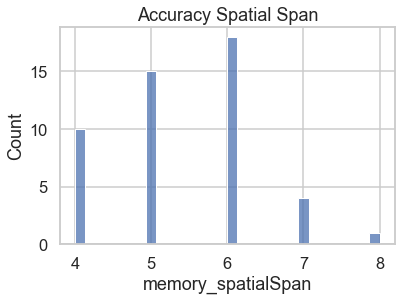

In [19]:
_ = sb.histplot(data = df2, x = "memory_spatialSpan", bins = 30)
plt.title("Accuracy Spatial Span")

Text(0.5, 1.0, 'Accuracy Target detection')

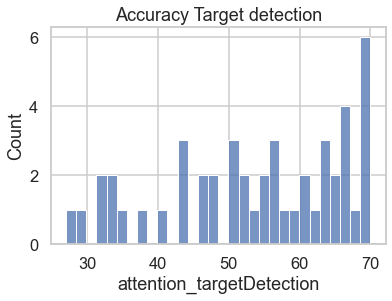

In [20]:
_ = sb.histplot(data = df2, x = "attention_targetDetection", bins = 30)
plt.title("Accuracy Target detection")

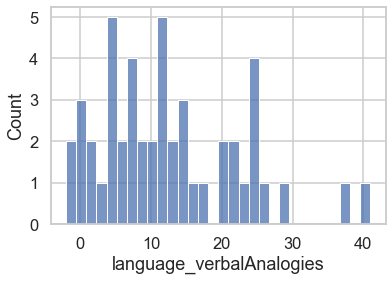

In [21]:
_ = sb.histplot(data = df2, x = "language_verbalAnalogies", bins = 30)

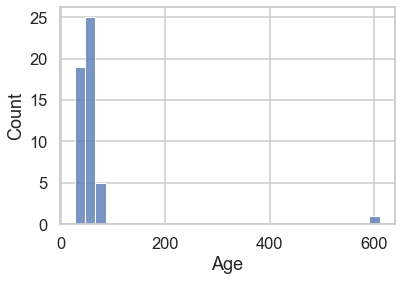

In [22]:
_ = sb.histplot(data = df2, x = "Age", bins = 30)

We see that for the cognitive variables the data looks valid. However, when we look at age, one person seems to be over 600 years old! Unless we are dealing with a vampire, we may want to do something about this data. There are multiple ways to deal with this type of data but the simplest and most straightforward is to get rid of it, by replacing it with a NaN value.

40    610
Name: Age, dtype: int64


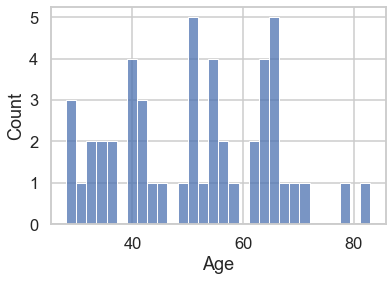

In [23]:
print(df2.Age[df2.Age > 100]) #show all the people who had an age over 100
df2.Age.loc[df2.Age > 100] = np.nan  #replace with NaNs anyone who is older than 100
_ = sb.histplot(data = df2, x = "Age", bins = 30) #plot the new data


Check for the remaining variables if there is any data that is not valid. If you find anything, replace it with NaNs

Now that we have established that the data looks healthy, the next thing on the list is to check whether there are any duplicated values in our dataset. The easiest way to check this is via the number of unique user IDs. If we had no duplicates, then the number of unique IDs should correspond with the total number of rows in our data.

In [24]:
print(len(np.unique(df2.userID)))
print(len(df2.userID))

48
50


You can also use the `duplicated` function to obtain the same results.

In [25]:
sum(df2.duplicated()) 

2

It looks like we got two duplicates in our data. Let us try to remove them.

In [26]:
df2 = df2[~df2.duplicated()] #Have a look at lecture 8 if you don't remember this function
sum(df2.duplicated()) # calculate the number of duplicates again after removing them. If we were succcessful none should be there anymore.

0

We are almost done cleaning our data. Now let's check if there are any missing values. It's generally good practice to get rid of participants with missing data or replace those values with plausible estimates (like the mean/median). In this case, we will show the first. To find out if we have any missing values we can use the `isna` function. This returns True when there is a missing value and False when there isn't one.

In [27]:
df2.isna().sum()

userID                               1
Age                                  1
Sex 1-Male 2-Female                  0
Handedness                           1
Qualifications                       0
First Language                       0
First Language 1-English 0-Other     0
Mechanical ventilation (1-Y,0-no)    0
memory_spatialSpan                   2
attention_targetDetection            2
language_verbalAnalogies             2
dtype: int64

Let's try to understand how many different people have missing values among the 50 participants. 

In [28]:
sum_missing = df2.isna().sum(axis=1) #This shows us how many missing values each person has
print(sum(sum_missing > 0)) #how many people have at least one missing data


3


Let's get rid of the 3 people who have at least one missing value

In [29]:
df2 = df2[~(sum_missing > 0)]

Another important check we need to perform is to look for outliers. These are often less easy to spot and sometimes it is unclear if one value is an outlier or not. Some researchers may be tempted to remove more extreme values only because it helps with their hypothesis, which creates bias as it is a form of "p hacking". Just because a value is extreme it does not always mean that it is wrong. However, if you don't do something about your outliers, they also can bias your plots and statistical results.

One robust, objective way to deal with outliers is via a process called winsorisation. This approach replaces the extreme values in our data with slightly less extreme values, in order to limit the effect of the outliers on the calculations or the results. The mean value calculated after such replacement of the extreme values is called winsorized mean. 

For example, 90% winsorization means the replacement of the top 5% and bottom 5% of the data. The top 5% of the data is replaced by the value of the data at the 95th percentile and the value of the bottom 5% of the data is replaced by the value of the data at the 5th percentile. 

Let's see if our cognitive data requires any winsorisation by visualising it.

(array([1, 2, 3]), [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

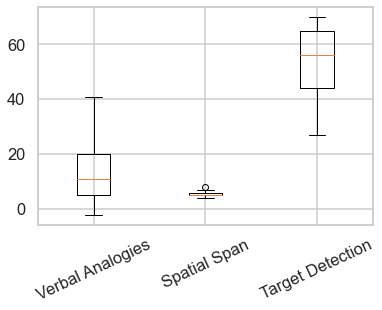

In [30]:
_ = plt.boxplot([df2.language_verbalAnalogies, df2.memory_spatialSpan, df2.attention_targetDetection], 
               labels = ["Verbal Analogies", "Spatial Span", "Target Detection"])
plt.xticks(rotation=25)

The scales are very different, so it is not easy to visualise Spatial Span with the other tasks. However, we can see that it looks like there is an outlier. Let's plot spatial span alone to check more in detail. 

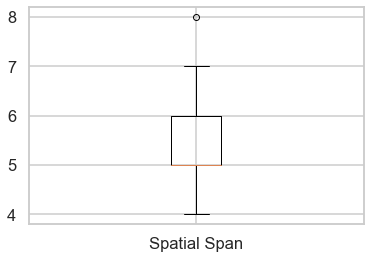

In [31]:
_ = plt.boxplot(df2.memory_spatialSpan, labels = ["Spatial Span"])

Looking at the box plot, we can see that for the memory Spatial Span task, we have one person who performed really well. A score of 8 is plausible within this task, but not very common. For that reason, it is not valid for us to just remove it. Instead, let us apply the winsorisation procedure to replace the value with something a bit less extreme by replacing the values above the 95th percentile with the value of the score on the 95th percentile.

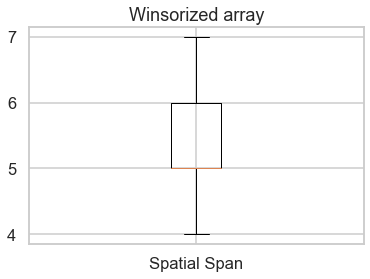

In [32]:
winsorized_memory = winsorize(df2['memory_spatialSpan'],(0.05,0.05))  #apply winsorisation
  
plt.boxplot(winsorized_memory, labels = ["Spatial Span"])  #visualise the data after winsorisation
plt.title('Winsorized array')
plt.show()

It now looks a lot better! Let's replace the old values in the memory task with the winsorised version.

In [33]:
df2['memory_spatialSpan'] = winsorized_memory

One final check, now that the data is in the right format and we are confident that it is correct, is to ensure everything is on the same scale. Different tasks will have different scoring mechanisms. While on some tasks the scores may range from 4 to 8, in others they may range between 30 and 70. This is often a problem as depending on the statistical test you use, if one variable has very large values, it will dominate over other variables. So the features with higher variability may receive more weight than the others even though in theory they should not.

To scale the features, there are two options that can be completed:

1. **Standardisation**: scale numbers based on the mean and standard deviation
2. **Normalisation**: scale the numbers between 0 and 1. 

To`standardise` features, we can use the following equation.

$$featureScaled = \frac{feature - \mu_{feature}}{\sigma_{feature}} $$

Where $\mu_{feature}$ corresponds to the mean of the feature and $\sigma_{feature}$ to its standard deviation.

Instead, to complete data `normalisation`, we can use the following equation:

$$ featureNormalised = \frac{feature - {feature}_{MIN}}{feature_{MAX} - feature_{MIN}} $$

`standardisation` is a bit more robust towards outliers compared to `normalisation`, and the latter tends to be used when the data don't follow a Gaussian distribution. **But this is not a rule.** You can use standardisation even if your data are not normally distributed, and the choice of feature scaling really depends on your analysis. 

In this case, we want to evaluate at the end how much the performance of patients deviates from the performance of healthy controls in terms of standard deviation units. This is why using standardisation, which scales the values according to mean and std is more appropriate. However, there is an issue. If we standardise the patients and healthy controls separately, then we will end up using two different means and standard deviations, which will make their performances incomparable. This is why we need to standardise the patients score in each cognitive task with the respective mean and standard deviation of the healthy controls scores.

Let's examine the healthy controls data.

In [34]:
df_healthy = pd.read_csv("Data/demographics_day2.csv")
df_healthy.shape

(15722, 22)

As you can see the healthy dataset contains 15722 rows and 15 columns. Each row has data of one healthy participant, and contains their performance in the three cognitive tasks of interest as well as their demographics. The healthy participants were selected in such a way that there were at least 50 people for each possible combination of demographics, and the cognitive scores were already cleaned from the biggest outliers.

Have a look at the variables.

In [35]:
df_healthy.head()

SummaryScore_SpatialSpan  RT_SpatialSpan  \
0                       8.0          5414.0   
1                       7.0          3066.5   
2                       7.0          2366.0   
3                       6.0          3332.5   
4                       5.0          1591.5   

                                user_id  SummaryScore_targetDetection  \
0      fc9b0048ab9e40a9aa823e195bd12043                          49.0   
1      87f080fe66374700a2b54c350a560d20                          71.0   
2  3c20040d-c5a7-4394-b7b4-daa04ca5f240                          62.0   
3      3edc12d8ead348b094782ca9b74f8446                          48.0   
4      b1cc65d5aaa44aecb557747438897a41                          43.0   

   RT_targetDetection  SummaryScore_VerbalAnalogies  RT_VerbalAnalogies  \
0              1916.0                             4              4722.0   
1               886.0                            16              3045.0   
2              1303.0                            22              2355.0   
3               876.5                            -9              4751.5   
4              2017.0                             4              2597.0   

        Residence Language binary          Ethnicity     Sex   Education  \
0   United States         English  American Hispanic  Female  00_preGCSE   
1  United Kingdom         English  American Hispanic  Female  00_preGCSE   
2  United Kingdom         English  American Hispanic  Female  00_preGCSE   
3  United Kingdom         English  American Hispanic  Female  00_preGCSE   
4  United Kingdom         English  American Hispanic  Female  00_preGCSE   

     Handedness Occupation   Salary timepoint_by_date   Age  Imputation  \
0  Right handed     Worker  £40-50K               tp1  27.0           0   
1  Right handed     Worker  £10-20K               tp1  27.0           0   
2  Right handed     Worker   £0-10K               tp1  28.0           0   
3   Left handed     Worker  £30-40K               tp1  36.0           0   
4  Right handed     Worker  £40-50K               tp1  38.0           0   

  Device Summary  Normative  Age squared  Age decade  
0    Apple phone          0        729.0          20  
1  Android phone          0        729.0          20  
2    Apple phone          0        784.0          20  
3    Apple phone          0       1296.0          30  
4    Apple phone          0       1444.0          30

Notice there are quite a few we don't need, so we will just select the variables that we want to compare against the patients.

In [36]:
dfH = df_healthy[['SummaryScore_SpatialSpan', 'SummaryScore_VerbalAnalogies', 'SummaryScore_targetDetection', 'Age', 'Sex', 'Language binary']]

In [37]:
dfH.head()

SummaryScore_SpatialSpan  SummaryScore_VerbalAnalogies  \
0                       8.0                             4   
1                       7.0                            16   
2                       7.0                            22   
3                       6.0                            -9   
4                       5.0                             4   

   SummaryScore_targetDetection   Age     Sex Language binary  
0                          49.0  27.0  Female         English  
1                          71.0  27.0  Female         English  
2                          62.0  28.0  Female         English  
3                          48.0  36.0  Female         English  
4                          43.0  38.0  Female         English

Let's now try to plot the distributions of the scores in the three cognitive tasks to see how they look

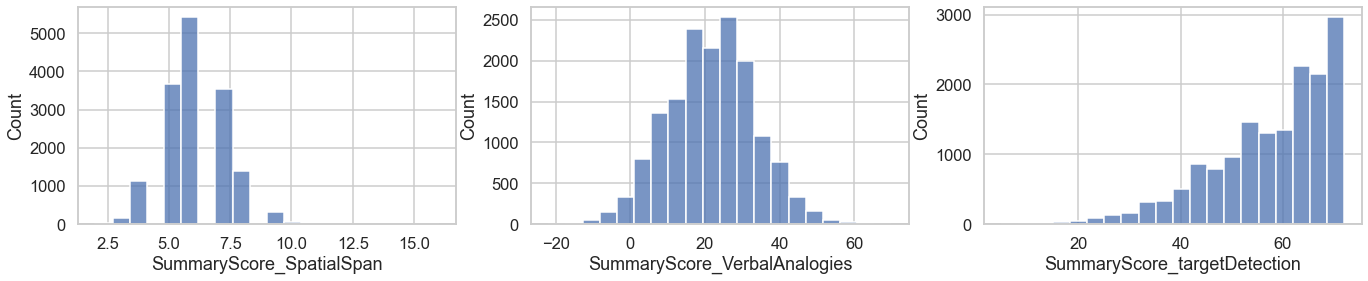

In [45]:
plt.figure(figsize = (23, 4))
plt.subplot(131)
_ = sb.histplot(dfH.SummaryScore_SpatialSpan, bins = 20)
plt.subplot(132)
_ = sb.histplot(dfH.SummaryScore_VerbalAnalogies, bins = 20)
plt.subplot(133)
_ = sb.histplot(dfH.SummaryScore_targetDetection, bins = 20)

As expected, it appears that the majority of the people perform more or less average, with just few people having really high or low scores. However, target detection appears to have a longer lower tail. Now that we have the healthy control data, we can use their mean and standard deviation to scale the patients and control data.

In [46]:
memory_task = (df2['memory_spatialSpan'] - dfH['SummaryScore_SpatialSpan'].mean())/dfH['SummaryScore_SpatialSpan'].std()
language_task = (df2['language_verbalAnalogies'] - dfH['SummaryScore_VerbalAnalogies'].mean())/dfH['SummaryScore_VerbalAnalogies'].std()
attention_task = (df2['attention_targetDetection'] - dfH['SummaryScore_targetDetection'].mean())/dfH['SummaryScore_targetDetection'].std()

In [47]:
memory_task_control = (dfH['SummaryScore_SpatialSpan'] - dfH['SummaryScore_SpatialSpan'].mean())/dfH['SummaryScore_SpatialSpan'].std()
language_task_control = (dfH['SummaryScore_VerbalAnalogies'] - dfH['SummaryScore_VerbalAnalogies'].mean())/dfH['SummaryScore_VerbalAnalogies'].std()
attention_task_control = (dfH['SummaryScore_targetDetection'] - dfH['SummaryScore_targetDetection'].mean())/dfH['SummaryScore_targetDetection'].std()

In the above code we subtracted the mean values and divided by the standard deviation, to obtain standardised values. Then, we replace old values with the standardised ones. We can visualise these changes to better understand how our data looks now.

Text(0.5, 1.0, 'Healthy controls - Performance after scaling')

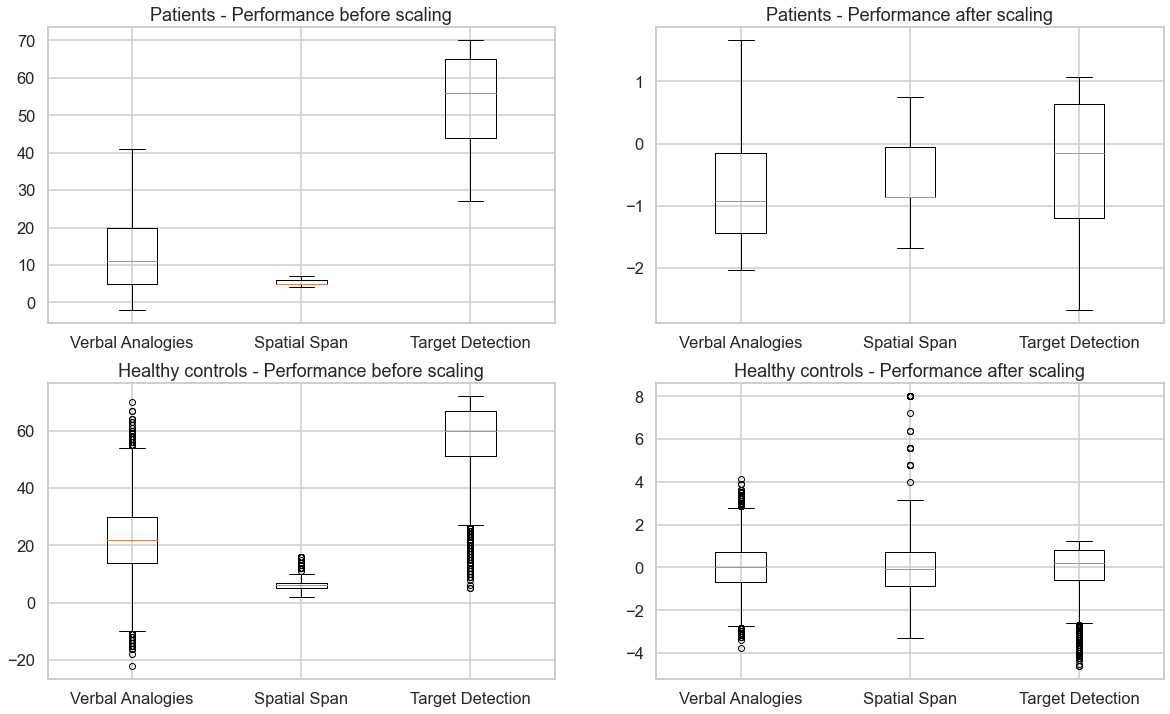

In [48]:
plt.figure(figsize = (20, 12))
plt.subplot(221)
_ = plt.boxplot([df2.language_verbalAnalogies, df2.memory_spatialSpan, df2.attention_targetDetection], 
               labels = ["Verbal Analogies", "Spatial Span", "Target Detection"])
plt.title("Patients - Performance before scaling")
plt.subplot(222)
_ = plt.boxplot([language_task, memory_task, attention_task], labels = ["Verbal Analogies", "Spatial Span", "Target Detection"])
plt.title("Patients - Performance after scaling")
plt.subplot(223)
_ = plt.boxplot([dfH['SummaryScore_VerbalAnalogies'], dfH['SummaryScore_SpatialSpan'] , dfH['SummaryScore_targetDetection']],
                labels = ["Verbal Analogies", "Spatial Span", "Target Detection"])
plt.title("Healthy controls - Performance before scaling")
plt.subplot(224)
_ = plt.boxplot([language_task_control, memory_task_control, attention_task_control], labels = ["Verbal Analogies", "Spatial Span", "Target Detection"])
plt.title("Healthy controls - Performance after scaling")


As you can see, in case of healthy controls, the data have now, more or less, a mean of 0 and std of 1. However, this is not exactly the same for patients. The reason is that patients tend to be impaired. If we had used different group means when standardising, these impairment would have been standarised out!!

Let's now replace the values in the original dataframe with the scaled ones, both for healthy and patients. We could have replaced the values directly above, but we preferred not to do it in order to be able to create the boxplots and observe the changes before and after the feature scaling.

In [49]:
df2['memory_spatialSpan'] = memory_task
df2['language_verbalAnalogies'] = language_task
df2['attention_targetDetection'] = attention_task

dfH['memory_spatialSpan'] = memory_task_control
dfH['language_verbalAnalogies'] = language_task_control
dfH['attention_targetDetection'] = attention_task_control

By doing this, we created three new columns in the healthy control dataset with the same column names as the patients, and containing the scaled features. We can now remove the old columns. 

In [50]:
dfH = dfH.drop(["SummaryScore_VerbalAnalogies", 'SummaryScore_SpatialSpan', 'SummaryScore_targetDetection'], axis = 1)
dfH.head()

Age     Sex Language binary  memory_spatialSpan  language_verbalAnalogies  \
0  27.0  Female         English            1.551192                 -1.518426   
1  27.0  Female         English            0.744876                 -0.488172   
2  28.0  Female         English            0.744876                  0.026954   
3  36.0  Female         English           -0.061440                 -2.634534   
4  38.0  Female         English           -0.867757                 -1.518426   

   attention_targetDetection  
0                  -0.759205  
1                   1.157225  
2                   0.373231  
3                  -0.846316  
4                  -1.281868

This was the last data cleaning step for the patients, let's now look into more details on the healthy controls data and their demographics.
If you look carefully, you will notice that some data is saved in different formats (e.g. Sex, Language). Before we can compare the two groups we need to make sure that the two datasets are comparable. This process is commonly known as `harmonization` of data.

Let's first create binary variables for `language` and `sex`, using the same exact encoding of control. Based on the column titles, the sex columns assigned a 1 to males and 2 to females. Let's check which options are available in the healthy control dataset.

**IMPORTANT**: if you assign the wrong integer to the wrong group within each category, all the results will be incorrect.

In [51]:
dfH.Sex.value_counts(), dfH["Language binary"].value_counts()

(Male      8032
 Female    6694
 Other      996
 Name: Sex, dtype: int64,
 English    11510
 Other       4212
 Name: Language binary, dtype: int64)

Note that `Sex` here has a third option called `Other`. In this case, the variable *Other* can be kept in the dataset because of two reasons. First, we know that patients and healthy participants were asked to complete the same questionnaire, which means that the reason why the group *Other* is not in the patient data is because no participants chose it. If there was an inconsistency between the questions asked to the patients and the participants, the data collection deisgn would be really poor, because it wouldn't allow us to properly compare healthy controls with patients.  
Secondly, since the extra group is in the healthy control it isn't a big issue. However, in the opposite circumstance, there would be no healthy participants to use as reference which would make it impossible to evaluate the changes in cognitive ability of patients that selected *Other* as their sex.

Let's just add a third option for Others.

In [52]:
mapping_language = {"English": 1, "Other": 0}
mapping_sex = {"Male": 1, "Female": 2, "Other": 3}

mapped_language_control = dfH['Language binary'].map(mapping_language)
mapped_sex_control = dfH['Sex'].map(mapping_sex)

dfH['Language binary'] = mapped_language_control
dfH['Sex'] = mapped_sex_control

Now check if there are any missing values, and if there are remove them. 

In [53]:
# CODE HERE

Finally we can rename the column names to give a easy-to-understand name that matches with the column names of the patients.

In [54]:
dfH.rename(columns = {'Language binary':'First Language 1-English 0-Other'}, inplace = True)
dfH.rename(columns = {'Sex':'Sex 1-Male 2-Female'}, inplace = True)
dfH.head()

Age  Sex 1-Male 2-Female  First Language 1-English 0-Other  \
0  27.0                    2                                 1   
1  27.0                    2                                 1   
2  28.0                    2                                 1   
3  36.0                    2                                 1   
4  38.0                    2                                 1   

   memory_spatialSpan  language_verbalAnalogies  attention_targetDetection  
0            1.551192                 -1.518426                  -0.759205  
1            0.744876                 -0.488172                   1.157225  
2            0.744876                  0.026954                   0.373231  
3           -0.061440                 -2.634534                  -0.846316  
4           -0.867757                 -1.518426                  -1.281868

We are finally ready for analysis!

What we will do now is perform an analysis called `Deviation from expected`. This analysis allows us to examine how far from the healthy norm the patients are in each task, with respect to their performance and based on their demographics. The reason why we account for the demographics is because they play a role on the performance of participants. We cannot expect 10 years old children to perform like 50 or 80 years old adults!

Simply put, this analysis trains a linear regression model, using as independent variables the demographics of healthy participants and dependent variables their scores in the cognitive tasks. Essentially what the regression model does is learn how participants are supposed to perform based on their demographics if they were healthy. This model then can be used to predict the performance of the patients. The difference between the predicted performance and the actual performance will be the Deviation from Expected. This deviation from expected is already in standard deviation units, because we standardised our data during the data cleaning.

Let's start to measure the deviation from expected for the `Spatial Span memory task`, using `Age`, `Sex` and `First Language` as predictors.

In [55]:
linr_model = LinearRegression().fit(dfH[["Age","Sex 1-Male 2-Female","First Language 1-English 0-Other"]], dfH['memory_spatialSpan'])
DT_predict = linr_model.predict(df2[["Age","Sex 1-Male 2-Female","First Language 1-English 0-Other"]]) #Predictions on patient data
print(DT_predict)


[-0.57627557 -0.4896522  -0.12899364 -0.3918963  -0.51219336  0.08146806
 -0.28678176 -0.64389905  0.0738768  -0.2791905  -0.62135789  0.16404143
 -0.39594629 -0.35440524 -0.0537789   0.32182955 -0.24169944 -0.30173166
 -0.66998148 -0.01628784 -0.30173166  0.21671502 -0.06137016 -0.35440524
 -0.61730789 -0.43697862 -0.10645248 -0.57222557  0.00979458 -0.08037005
 -0.78268728 -0.3918963  -0.52714325  0.09995922  0.19012386 -0.14799353
 -0.3769464   0.21671502 -0.03123774  0.36286188  0.1675827  -0.41848745
 -0.28324049 -0.03123774  0.20912375]


In [56]:
print(linr_model.coef_)

[-0.02254116 -0.24036149  0.00405   ]


Let's now calculate the deviation from expected by looking at the difference between the true score and the predicted score from the model

In [57]:
deviation_from_expected = df2["memory_spatialSpan"] - DT_predict

Plot to see how patients performed in relation to controls

Text(0.5, 1.0, 'Deviation from expected (sd units) \n Spatial Span')

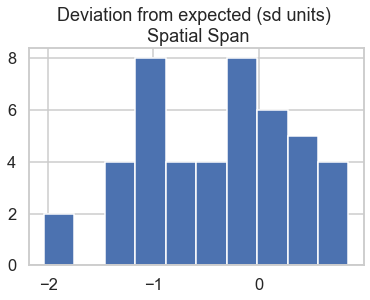

In [58]:
plt.hist(deviation_from_expected)
plt.title("Deviation from expected (sd units) \n Spatial Span")

From the plot, you can already see that most of the patients have a negative score, which means that their actual performance was lower compared to their predicted performance, which suggests that they are impaired. Let's try to understand what is the mean Deviation from Expected and how many participants had a negative score.

In [59]:
np.mean(deviation_from_expected)

-0.3907249791349783

In [60]:
len(deviation_from_expected[deviation_from_expected<0])

31

Let's run a one sample t-test against 0 to examine whether this trend is significant. A sample t-test against zero is run as we expect to see a value of zero if there was absolutely no difference between patients and controls. If the test is significant, then the difference is significantly different from zero.

In [61]:
# perform one sample t-test
import scipy.stats as stats

t_statistic, p_value = stats.ttest_1samp(a=deviation_from_expected, popmean=0)
print(t_statistic , p_value)

-3.680143064756429 0.0006327664242747124


From this, we can see that patients performed statistically worse than controls on memory tests, as expected!!

-------------
### Code here

Now that we went through the most important aspects of the analysis,let's try to reply to the following questions.

1. Are patients impaired in attention and language? Did the patients perform worse or better?
2. What if we also include education and handedness in our regression model? Perform some harmonisation between the two datasets, such that there are only 3 types of education, pre-bachelor, BSc/MSc and PhD/MD. Then, include these in the regression model and check if your results change.
3. Try to analyse the change in RT. How do the results differ? Why?

In [ ]:
#CODE HERE

--------

# DAY 2 CHALLENGE - Cognitive impairments in patients with Dementia

For today's challenge we will use all of the concepts we learned in this session and apply them to a new dataset. Today's dataset contains a set of patients with Alzheimer's Disease who have gone through the same set of cognitive tests that our previous participants did (and a few more). The description of the tasks is available underneath. 

1. Select 3 of the cognitive tasks and 5 demographic variables that you think are of interest for this group of patients and perform data cleaning and pre-processing on them, in a similar fashion to what we performed during the Workshop. Make sure you justify why you used certain tasks and not others, and also explain why you made certain pre-processing choices.

2. Is the accuracy and reaction time of dementia patients different from that of controls? Discusss the implications of the results and create meaningful plots to show any group differences (or lack thereof). *Bonus points will be awarded if Seaborn is used for your plots, but we will not deduct points if this is not used.*

3. Can you predict how long a person has had dementia based on their cognitive scores? Hint: you will need to refactor your dependent variable from a string format to a numeric format (e.g. number of years since diagnosis). Discuss and interpret these results. If you have a good reason to include other variables in the model, we are happy for you to do so, and if this is correctly justified and explained we will award bonus points. However, you do not need to do this.

## Tasks description
### Immediate and delayed word memory
The words immediate memory task is a memory task that requires participants to retain in memory a series of words and recall them shortly after. More specifically, first, a set of words is presented to participants and then the same words are presented again (targets) along with the same number of new words (non-targets). Participants have to indicate if the words are targets or non targets. The delayed memory task is equivalent to the immediate task with the difference that more time has passed between when the words were presented the first time.   

### Blocks
Blocks is a spatial problem solving task. The participant is presented with a grid of coloured blocks on the left-hand side of the screen and on the right-hand side, a black silhouette made up of a subset of the shapes on the left. The participant must make the shape of the left-hand blocks match the silhouette on the right-hand side by removing blocks. The blocks fall under gravity. 
<img src="Figures/Blocks.png" width="40%">

### Digit Span
Digit Span is a working memory task. Participants view a sequence of digits that appear on the screen one after another. Subsequently, they repeat the sequence of numbers by entering them using an on-screen number pad. Every time a sequence is recalled correctly, the length of the subsequent sequence is incremented by one. just like Spatial Span, the task ends when they make three consecutive errors.

<img src="Figures/DigitSpan.png" width="40%">
<!--- 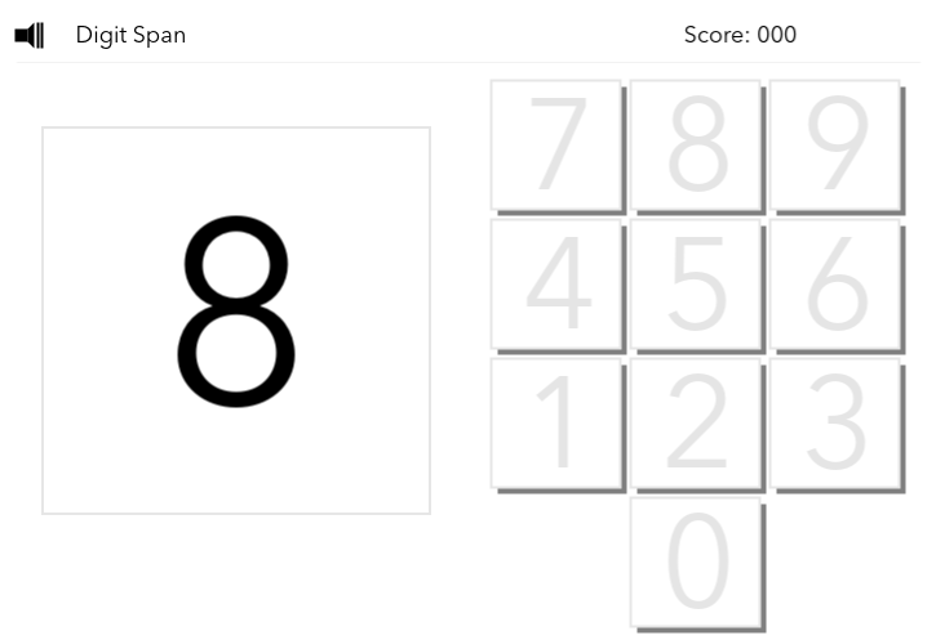 --->

### 2D Manipulations
2D Manipulations is a spatial task that consists of a 6x6 grid with coloured squares presented at the top of the screen, together with four additional grids with coloured squares presented below (i.e. probe grids). One of the four grids is identical to the target grid above but is rotated by either 90, 180 or 270 degrees whilst the other grids differ by five squares. To obtain maximum points, the participant must indicate which of the four grids is identical to target when rotated, solving as many problems as possible within three minutes. 

<img src="Figures/2DManipulations.png" width="40%">
